In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")

In [ ]:
df.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

In [10]:
df2=df

In [11]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  159893.000000   159893.000000  159893.000000  159892.000000
mean       28.308949        3.375651       3.913617       7.107304
std         6.385305        7.946160       7.953648       1.454511
min        12.020000        0.000000       0.000000       1.000000
25%        23.910000        0.000000       0.000000       6.000000
50%        27.320000        0.000000       0.000000       7.000000
75%        31.460000        2.000000       3.000000       8.000000
max        94.850000       30.000000      30.000000      24.000000

In [12]:
df.duplicated().sum()

5339

In [13]:
df = df.drop_duplicates()

In [14]:
cols = ['KidneyDisease','Diabetic' ,'Stroke' ,'Asthma','SkinCancer']
fig, ax = plt.subplots(5, 2, figsize = (20, 32))
i =0
for col in cols:
    df_yes = df[df[col] == 'Yes']
    df_no = df[df[col] == 'No']

    sns.countplot(data=df_yes, x='HeartDisease', ax = ax[i][0], palette='Set1' ).set_title(col)
    sns.countplot(data=df_no, x='HeartDisease',  ax = ax[i][1], palette='Set1' ).set_title("NO "+col)

    i=i+1
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
irises_colors = ['rgb(33, 75, 99)', 'rgb(79, 129, 102)', 'rgb(151, 179, 100)',
                 'rgb(175, 49, 35)', 'rgb(36, 73, 147)']
cols = ['Smoking','AlcoholDrinking' ,'PhysicalActivity' ]
for i in cols :
    df_yes = df[df[i] == 'Yes']
    df_no = df[df[i] == 'No']

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

    fig.add_trace(go.Pie(values = df_no.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=1)
    fig.add_trace(go.Pie(values = df_yes.HeartDisease.value_counts().values, labels = [f'No {i}',f'with {i}'],
        marker_colors=irises_colors),row=1,col=2)
    fig.update_layout(legend_title="Labels",
                      annotations=[dict(text=f'No {i}',x=0.15, y=1.10, font_size=30),
                                  dict(text=f'with {i}',x=0.80, y=1.10, font_size=30)],)

    fig.show()

**Smoking and no physical activity are going to double the chances of getting heart disease**

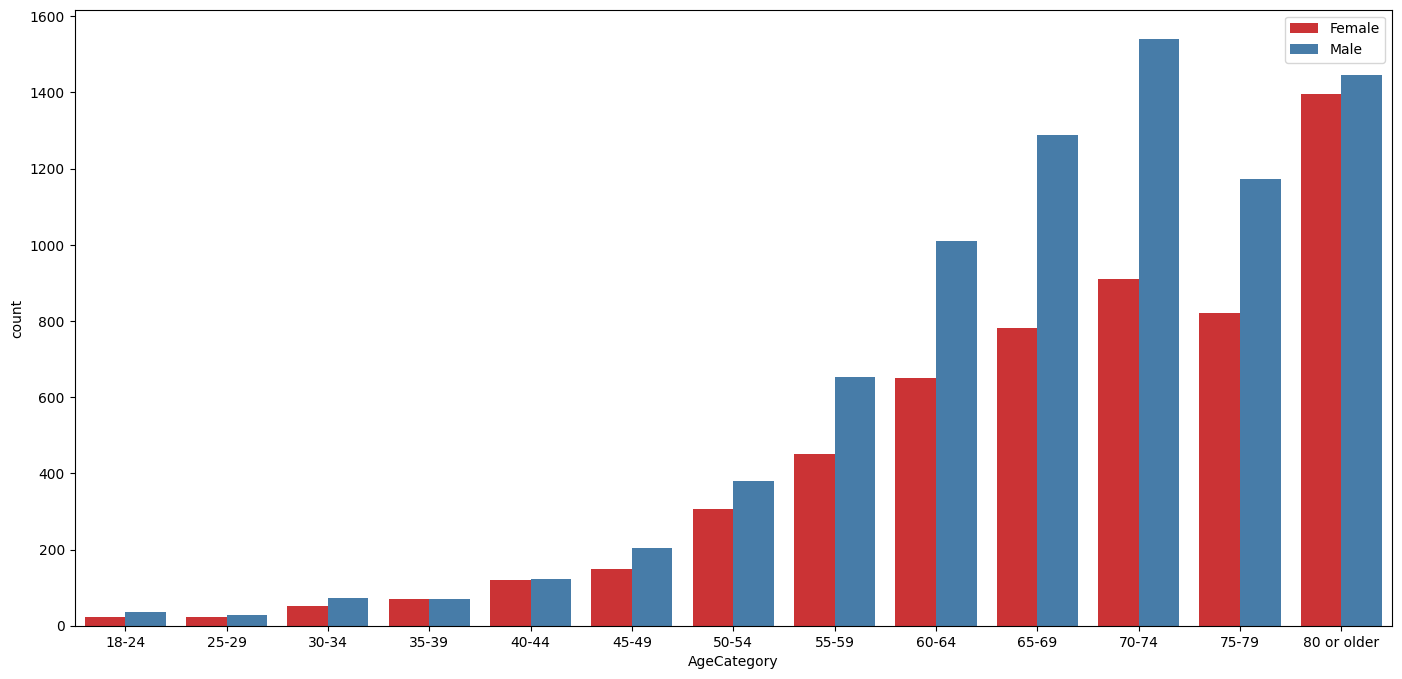

In [16]:
order = pd.unique(df.AgeCategory.values)
order.sort()
plt.figure(figsize = (17,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='Set1', order=order)
plt.legend(['Female','Male'])
plt.show()

As people get older, the chances of getting heart disease increase¶
males tendes to get heart disease more than females bold text

In [17]:
sns.countplot(data=df,x='HeartDisease',palette='Set1')

<Axes: xlabel='HeartDisease', ylabel='count'>

In [18]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
x=df2.drop('HeartDisease',axis=1).values
y=df2['HeartDisease'].values

# **SMOTE**

In [22]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(x, y)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

NameError: name 'X' is not defined

In [ ]:
Y.mean()

0.5

The above Value tells us that the the Target Variable is balanced now

In [ ]:
plt.figure(figsize= (15,15))
sns.heatmap(df2.corr(), annot = True ,fmt='0.2f')
plt.show()

**XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators= 550 , max_depth= 3 , learning_rate = 0.2)
'reg_alpha': 0.1,  # L1 regularization term
'reg_lambda': 0.1,  # L2 regularization term

In [ ]:
xgb.fit(x_train , y_train);

In [ ]:
print (xgb.score(x_train , y_train))
print (xgb.score(x_test , y_test))

0.9329685629839517
0.9311044490293752


In [ ]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test,xgb.predict(x_test)))

NameError: name 'classification_report' is not defined

In [ ]:
from sklearn import metrics
plt.figure()
models = [{
    'label': 'XGBoost',
    'model': xgb,
    }
]

<Figure size 640x480 with 0 Axes>

In [23]:
from sklearn.metrics import roc_auc_score

# Assuming xgb is your trained model and X_test, y_test are your test data and labels
probabilities = xgb.predict_proba(x_test)[:, 1]  # Get probabilities of the positive class
auc_score = roc_auc_score(y_test, probabilities)  # Calculate AUC

print(f"AUC: {auc_score}")

NameError: name 'xgb' is not defined

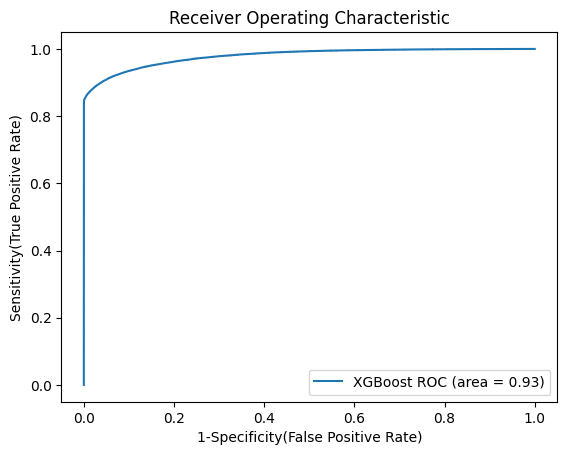

In [ ]:
for m in models:
    model = m['model']
    y_pred=model.predict(x_test)
        # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
        # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()